<div align=center>
<font size=6>
<font/>
<br>
<font color=#0dfc00>
Sharif University of Technology
</font>
<p></p>
<font color=#8ce300>
Numerical Calculations
</font>
<p></p>
<font color=#f2cf00>
Dr. Fatemeh Baharifard
</font>
<br/>
<br/>
<font color=ffcc00>
Spring 2022
</font>
</div>

<hr/>
		<div align=center>
		    <font color=ff9c00 size=6>
			    <br />
Final Project
            	<br/>
			</font>
    <br/>
  <font size=4, color=#CC6600>
    Authors:
    <br>
    MohammadMahdi Abootorabi
    <br>
    Mohammadreza Daviran
    <br>
    Kasra Amani
    <br>
    Bahar Asadi

  </font>
    <br/>
<font size=5, color=red>
    <br/><br/>
Deadline: Tir 22nd
</font>
                <br/>
    </div>

This is the **Final Project of Numerical Calculations**, Spring-2022.


In this project you need to complete this notebook with full regard to the demands of the questions.


There are 8 Questions each containing a Theoretical and a Practical part. These 8 questions have 330 points in total which equals 3.3 out of 21.3 from your final grade.


Note that this project has an additional score which does not count on the formal 20 score grading. By solving all the questions you may gain 0.3 additional score in the final grading. 


*Good Luck!*

# Q1:
*Author: MohammadMahdi Abootorabi*

**30 Points**

---
**Theoretical:**
<br>Let $a_i$ ($1 \le i \le n$) be a positive number. Prove that

a): $e(\sum_{i}^{n}{a_i}) \le \sum_{i}^{n}{e(a_i)} $
<br>
let $a_i$ be the real value and $\bar{a_i}$ to be our approximation
$|a_1 - \bar{a_1}| \le e_\bar{a_1}, |a_1 - \bar{a_2}| \le e_\bar{a_2} , ... , |a_n - \bar{a_n}| \le e_\bar{a_n} \rightarrow \\ \bar{a_i} - e_\bar{a_i} \le a_i \le \bar{a_i} + e_\bar{a_i} \rightarrow \sum_{i}^{n}{\bar{a_i}} - \sum_{i}^{n}{e_\bar{a_i}} \le \sum_{i}^{n}{a_i} \le \sum_{i}^{n}{\bar{a_i}} + \sum_{i}^{n}{e_\bar{a_i}} \rightarrow \\ |\sum_{i}^{n}{a_i} - \sum_{i}^{n}{\bar{a_i}}| \le \sum_{i}^{n}{e_\bar{a_i}} \rightarrow e(\sum_{i}^{n}{a_i}) \le \sum_{i}^{n}{e(a_i)}$

b): $\delta(\sum_{i}^{n}{a_i}) \le max\{\delta(a_1),...,\delta(a_n)\} \\$
$\delta(\sum_{i}^{n}{a_i}) \le \frac{e(\sum_{i}^{n}{a_i})}{\sum_{i}^{n}{a_i}} \xrightarrow[]{section (a)} \le \frac{\sum_{i}^{n}{e(a_i)})}{\sum_{i}^{n}{a_i}}   =$$\frac{a_1}{\sum_{i}^{n}{a_i}} * \frac{e(a_1)}{a_1} + ... + \frac{a_n}{\sum_{i}^{n}{a_i}} * \frac{e(a_n)}{a_n} = \frac{a_1}{\sum_{i}^{n}{a_i}} * \delta(a_1) + ... + \frac{a_n}{\sum_{i}^{n}{a_i}} * \delta(a_n)$ $ \le 
\frac{a_1}{\sum_{i}^{n}{a_i}} * max(\delta(a_1,...,a_n)) + ... + \frac{a_n}{\sum_{i}^{n}{a_i}} * max(\delta(a_1,...,a_n)) $$=\frac{\sum_{i}^{n}{a_i}}{\sum_{i}^{n}{a_i}} * max(\delta(a_1,...,a_n)) \le max(\delta(a_1,...,a_n))   $


Write your answers here:


 **Practical**:
 <br>Below you are presented with the Num class; complete the class code in a way so that the class has the following properties:
 <br>a) The value of the Number has no more than 2 decimal places.
 <br>b) The relative error and absolute error of the Number are correct.
 <br>c) All arithmetic operations work correctly with the Number class and result in another Number with a correct upper bound on the errors (implementation must account for the error propagation on +, -, *, /)
 <br>Example:
 ```
  a = Num(1.23456)
  b = Num(5.67891)
  c = a + b
  print(a.value)
  print(a.abs_err)
  print(a.rel_err)
  print(c.value)
 ```
 > 1.23 <br>
 > 0.00456 <br>
 > 0.00369 <br>
 > 6.9 <br>

In [ ]:
import math
def truncate(number, decimals=0):
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor


class Num():
    abs_err = 0
    rel_err = 0

    def __init__(self, value):
        self.value = truncate(value, 2)
        self.abs_err = round(abs(value - self.value), 5)
        self.rel_err = round(self.abs_err / value, 5)

    def __add__(self, other):
        k = Num(self.value + other.value)
        k.abs_err = self.abs_err + other.abs_err + k.abs_err
        k.rel_err = (self.value * self.rel_err + other.value * other.rel_err) / (self.value + other.value)
        return k

    def __sub__(self, other):
        k = Num(self.value - other.value)
        k.abs_err = self.abs_err + other.abs_err + k.abs_err
        k.rel_err = (self.value * self.rel_err + other.value * other.rel_err) / (self.value - other.value)
        return k

    def __mul__(self, other):
        k = Num(self.value * other.value)
        k.abs_err = self.abs_err * abs(other.value) + other.abs_err * abs(self.value) + k.abs_err
        k.rel_err = self.rel_err + other.rel_err + k.rel_err
        return k

    def __truediv__(self, other):
        k = Num(self.value / other.value)
        k.abs_err = self.abs_err / abs(other.value) + other.abs_err * abs(self.value) / (other.value ** 2) + k.abs_err
        k.rel_err = self.rel_err + other.rel_err + k.rel_err
        return k

a = Num(1.23456)
b = Num(5.67891)
c = a + b
s = b/a
k = s+a
print(a.value)
print(a.abs_err)
print(a.rel_err)
print(c.value)
print(s.value)
print(s.abs_err)
print(s.rel_err)
print(k.value)
print(k.abs_err)
print(k.rel_err)

# Q2:
*Author: MohammadMahdi Abootorabi*

**25 Points**

---




 ***Practical***:<br>
 Write a program that implements the Generalized Newton–Raphson Method for the two variable version. Take $F(x,y)$ and $G(x,y)$ as input. Assume that there always is a solution for the inputs. Output must be an approximate intersection point.<br>
  <br>Example input (first one is $F$, second one is $G$):<br>
     ```
x * x + y * y - 4
x * y -  1
     ```
     <br>
     <br>

**Hint: see last slides of lecture two for more information.**

In [ ]:
from sympy import *
import numpy

x, y = symbols('x y')
g = sympify(input("enter function g with respect to x and y: "))
f = sympify(input("enter function f with respect to x and y: "))

D = diff(f, x) * diff(g, y) - diff(f, y) * diff(g, x)
D1 = -1*f * diff(g, y) + g * diff(f, y)
D2 = diff(f, x) * (-1*g) + f * diff(g, x)
Dd1 = D1 / D
Dd2 = D2 / D
f = lambdify((x, y), f, 'numpy')
g = lambdify((x, y), g, 'numpy')
D1 = lambdify((x, y), D1, 'numpy')
D2 = lambdify((x, y), D2, 'numpy')
D = lambdify((x, y), D, 'numpy')
Dd1 = lambdify((x, y), Dd1, 'numpy')
Dd2 = lambdify((x, y), Dd2, 'numpy')

x0 = 2
y0 = 1
x0_next = 2
y0_next = 1
while True:
    x0 = x0_next
    y0 = y0_next
    x0_next = x0 + Dd1(x0, y0)
    y0_next = y0 + Dd2(x0, y0)
    if abs(x0_next-x0) < 0.01 and abs(y0_next-y0) < 0.01:
        break
print(f"final x0 = {x0_next} and y0 = {y0_next}")
print(f(x0_next,y0_next),g(x0_next,y0_next))


# Q3:
*Author: MohammadMahdi Abootorabi*

**35 Points**

---




 ***Practical***:<br>
 Write a program that takes a real **polynomial** string as an input and tries to calculates a root for it. We use different methods to calculate it. <br>
  a) Implement the Bisection method to find a root (iterate until $|f(x_n)| \le 10^{-5}$ or 1000 steps).<br>
  b) Implement the Secant method to find a root (iterate until $|x_n - x_{n-1}| \le 10^{-5}$ or 1000 steps).<br>
  c) Implement the Newton-Raphson method to find a root (iterate until $|f(x)| \le 10^{-5}$ or 1000 steps).<br>
 You must implement the Horner method for evaluation of the polynomials (both $f$ and $f'$).<br>

 **input format**:<br>
 $a_nx$^$(n)$ $\pm$ $a_{n-1}x$^$(n-1)$ $\pm$ ... $\pm$ $a_0$<br>
 example: 5x^4 - 2x^2 + 1x^1 - 8
 
 **make sure to parse the input correctly. Check convergence conditions in methods that need it.**  

In [61]:
from sympy import *
import numpy
import re
import random
#because of the random function we could get any kinds of interval so if the 
#function has more than one root any of the methods could get a different root
#so if you see two different numbers it means that the method got the one of the functions 
#other roots
def find_coefficients(func):
    all_coeffs = (re.findall(r'([-+]*[\d]+)(x*\^([\d]+))*', func))
    if len(all_coeffs) == 1:
        return [float(all_coeffs[0][0])]
    max_power = int(all_coeffs[0][2])
    co = []
    for i in range(max_power, 0, -1):
        k = False
        for j in all_coeffs:
            if j[2] != '' and int(j[2]) == i:
                co.append(float(j[0]))
                k = True
        if not k:
            co.append(0)
    co.append(float(all_coeffs[-1][0]))
    return co


def evaluate(x, func):
    a = find_coefficients(func)
    result = 0
    for i in range(0, len(a)):
        result = a[i] + (x * result)
    return result


def bisection(a, b, func, tolerance):
    tries = 0
    while True:
        tries += 1
        if evaluate(a, func) > 0:
            (b, a) = (a, b)
        x = (a + b) / 2
        Fx = evaluate(x, func)
        if abs(Fx) < tolerance or tries > 1000:
            return x
        else:
            if Fx < 0:
                a = x
            else:
                b = x


def secant(x_0, x_1, func, tolerance):
    n = 0
    tries = 0
    while True:
        tries += 1
        n += 1
        if (abs(x_0 - x_1)) < tolerance or tries > 1000:
            return x_1
        else:
            next_x = (x_0*evaluate(x_1,func)-x_1*evaluate(x_0,func))/ (evaluate(x_1, func) - evaluate(x_0, func))
            x_0 = x_1
            x_1 = next_x


def find_convergence(func, x):
    list1 = list(func)
    for i in range(len(list1)):
        if list1[i] == 'x':
            list1[i] = '*x'
    func = ''.join(list1)
    second_derivative = diff(diff(func, Symbol('x')), Symbol('x'))
    first_derivative = diff(func, Symbol('x'))
    second_derivative = str(second_derivative).replace('*x**', 'x^').replace('*x', 'x^1').replace(' ', '')
    first_derivative = str(first_derivative).replace('*x**', 'x^').replace('*x', 'x^1').replace(' ', '')
    func = str(func).replace('*x**', 'x^').replace('*x', 'x^1').replace(' ', '')
    return abs((evaluate(x, func) * evaluate(x, second_derivative)) / (evaluate(x, first_derivative) ** 2))


def newton_raphson(x, func, tolerance):
    tries = 1
    does_converge = find_convergence(func, x)
    if does_converge < 1:
        der_func = find_der(func)
        if der_func == 0:
            return 0
        while True:
            tries += 1
            next_x = x - evaluate(x, func) / evaluate(x, der_func)
            if abs(next_x - x) < tolerance or tries > 1000:
                return next_x
            x = next_x
    else:
        return "does not converge!!"


def find_der(func):
    list1 = list(func)
    for i in range(len(list1)):
        if list1[i] == 'x':
            list1[i] = '*x'
    func = ''.join(list1)
    return str(diff(func, Symbol('x'))).replace('*x**', 'x^').replace('*x', 'x^1').replace(' ', '')


function = input("enter function: ")
function = function.replace(" ", "")
x_0 = random.randint(-10, 0)
x_1 = random.randint(0, 10)
while evaluate(x_1, function) * evaluate(x_0, function) > 0:
    x_0 = random.randint(-10, 0)
    x_1 = random.randint(0, 10)
print(bisection(x_0, x_1, function, 10 ** -5))
print(secant(0, 2, function, 10 ** -5))
while find_convergence(function, x_1) >= 1:
    x_1 = random.randint(-10, 10)
print(newton_raphson(x_1, function, 10 ** -5))

enter function: 5x^4 - 2x^2 + 1x^1 - 8
1.1769300699234009
1.1769299584760957
1.176929958476322


# Q4:

*Author: Kasra Amani*

**35 Points**

---


**Theoretical:**<br>
The modified simpson's method was introduced in the 4th chapter of the course. Briefly explain in what ways this method is superior to its regular siblings and also, what are the downsides?


**Answer goes here**
<p>
    In the other simpson methods like 1/3 or 3/8 we had some condition on the number of steps for example the number of steps needed to be taken in 1/3 method was to be even but in the modified(custom) simpson method we could have any number of steps and this is the superiority of this method but the downside is that we need to do more computations and change the formula whenever needed

**Practical:**
## A
You might already be familiar with the scipy library. One of the many useful tools in this package is scipy.integrate.
Using the **quad** method which takes a **general function** as its first arguement, calculate the integrations given below (studying the scipy documentation is strongly recommended).
$$ \int_{-1}^{1} e^x cos(x) \,dx$$
$$ \int_{1}^{3} x^6+x^4-x^2+sin(2x) \,dx$$
$$ \int_{-2}^{2} \frac{3x^2}{e^x-arcsin(x)} \,dx$$
## B
Implement the Gauss-Legendre method with decent accuracy from the ground up (no scipy modules are allowed). Your implementation must take a python function as an input arguement and also the interval boundaries and return the integration result. It is guaranteed that the input boundary is in the domain of that function and your implementation does not need to account for such errors.
Use this code of yours on the very same functions introduced in section A and compare the results with what you got from the scipy integration module.
Note that your implementation might be tested with other integrals.

In [ ]:
import numpy as np
from scipy import integrate

func1 = lambda x: exp(x) * cos(x)
func2 = lambda x: x ** 6 + x ** 4 - x ** 2 + sin(2 * x)
func3 = lambda x: (3 * x ** 2) / (exp(x) - np.arcsin(x))
integral1 = integrate.quad(func1, -1, 1)[0]
integral2 = integrate.quad(func2, 1, 3)[0]
integral3 = integrate.quad(func3, -1/2, 1/2)[0]

print(integral1)
print(integral2)
print(integral3)

In [ ]:
import numpy as np
from scipy import integrate

def guass_legendre_acc3(func, a, b, n):
    points = [0, 0.774597, -0.774597]
    weights = [8 / 9, 5 / 9, 5 / 9]
    integral = 0
    for c in points:
        integral += weights[points.index(c)] * func((b - a) / 2 * c + (b + a) / 2)
    integral *= (b - a) / 2
    return integral


x = Symbol('x')
integral_function = input("enter a function with respect to x: ")
integral_func = lambdify(x, integral_function, 'numpy')
a, b = map(float, input("enter the limits of integration: ").split())
print(f"integral of {integral_function} = ", guass_legendre_acc3(integral_func, a, b, 3))

#and now to compare with part A integrals ::
#uncomment the code bellow to see the results::

# func1 = lambda x: exp(x) * cos(x)
# func2 = lambda x: x ** 6 + x ** 4 - x ** 2 + sin(2 * x)
# func3 = lambda x: (3 * x ** 2) / (exp(x) - np.arcsin(x))
# integral1 = integrate.quad(func1, -1, 1)[0]
# integral2 = integrate.quad(func2, 1, 3)[0]
# integral3 = integrate.quad(func3, -1/2, 1/2)[0]

# print(integral1)
# print(integral2)
# print(integral3)

# print("guass legendre 3 points: ", guass_legendre_acc3(func1, -1, 1, 3)
#       , "--- real integral by scipy: ", integral1)
# print("guass legendre 3 points: ", guass_legendre_acc3(func2, 1, 3, 3)
#       , "--- real integral by scipy: ", integral2)
# print("guass legendre 3 points: ", guass_legendre_acc3(func3, -2, 2, 3)
#       , "--- real integral by scipy: ", integral3)

# Q5:

*Author: Kasra Amani*

**35 Points**

---


**Theoretical:**<br>
Explain in a paragraph or two, what are the embeded Runge-Kutta methods? How do they improve upon the initial RK algorithm and what are the possible downsides?


**Answer goes here**
<p>
    The embedded methods are designed to produce an estimate of the local truncation error of a single Runge–Kutta step, and as result, allow to control the error with adaptive stepsize.Heun-Euler and Felberg are some of these methods.
<p>The major advantage of these methods is that for they are independent of the equation to be solved and therefor are very general but the downside is that they dont have the implicit Runge-Kutta methods efficiency thus they consume more memory and computation time.
    

**Practical:**
Given a 2nd order linear differential equation of following form
 $$y^{''}(x) + ay^{'}(\alpha_0 x + \alpha_1) + by(\beta_0 x + \beta_1) = c$$
 , $x_0$ as initial point, $h$ as interval length, $y^{'}(x_0)$ and $y(x_0)$, compute $y(x_0 + h)$ using the Runge-Kutta-Fehlberg method (aka RKF45).

 All inputs are given in console and the equation parameters are given in the following format:
 ```
 a alpha0 alpha1 b beta0 beta1 c
 ```
 Note that your code will be manually checked to see if you have implemented the algorithm correctly or not. For further information on the RKF45 read [this article](https://maths.cnam.fr/IMG/pdf/RungeKuttaFehlbergProof.pdf).

In [ ]:
def runge_kutta_fehlberg(f, g, x0, y0, z0, h, step_num):
    x = x0
    y = y0
    z = z0
    for i in range(step_num):
        kf1 = h * f(x, y, z)
        kg1 = h * g(x, y, z)
        kf2 = h * f(x + h / 4, y + kf1 / 4, z + kg1 / 4)
        kg2 = h * g(x + h / 4, y + kf1 / 4, z + kg1 / 4)
        kf3 = h * f(x + 3 / 8 * h, y + 3 / 32 * kf1 + 9 / 32 * kf2, z + 3 / 32 * kg1 + 9 / 32 * kg2)
        kg3 = h * g(x + 3 / 8 * h, y + 3 / 32 * kf1 + 9 / 32 * kf2, z + 3 / 32 * kg1 + 9 / 32 * kg2)
        kf4 = h * f(x + 12 / 13 * h, y + 1932 / 2197 * kf1 - 7200 / 2197 * kf2 + 7296 / 2197 * kf3,
                    z + 1932 / 2197 * kg1 - 7200 / 2197 * kg2 + 7296 / 2197 * kg3)
        kg4 = h * g(x + 12 / 13 * h, y + 1932 / 2197 * kf1 - 7200 / 2197 * kf2 + 7296 / 2197 * kf3,
                    z + 1932 / 2197 * kg1 - 7200 / 2197 * kg2 + 7296 / 2197 * kg3)
        kf5 = h * f(x + h, y + 439 / 216 * kf1 - 8 * kf2 + 3680 / 513 * kf3 - 845 / 4104 * kf4,
                    z + 439 / 216 * kg1 - 8 * kg2 + 3680 / 513 * kg3 - 845 / 4104 * kg4)
        kg5 = h * g(x + h, y + 439 / 216 * kf1 - 8 * kf2 + 3680 / 513 * kf3 - 845 / 4104 * kf4,
                    z + 439 / 216 * kg1 - 8 * kg2 + 3680 / 513 * kg3 - 845 / 4104 * kg4)
        kf6 = h * f(x + h / 2, y + -8 / 27 * kf1 + 2 * kf2 - 3544 / 2565 * kf3 + 1859 / 4104 * kf4 - 11 / 40 * kf5,
                    z + -8 / 27 * kg1 + 2 * kg2 - 3544 / 2565 * kg3 + 1859 / 4104 * kg4 - 11 / 40 * kg5)
        kg6 = h * g(x + h / 2, y + -8 / 27 * kf1 + 2 * kf2 - 3544 / 2565 * kf3 + 1859 / 4104 * kf4 - 11 / 40 * kf5,
                    z + -8 / 27 * kg1 + 2 * kg2 - 3544 / 2565 * kg3 + 1859 / 4104 * kg4 - 11 / 40 * kg5)
        x += h
        y += 16 / 135 * kf1 + 6656 / 12825 * kf3 + 28561 / 56430 * kf4 - 9 / 50 * kf5 + 2 / 55 * kf6
        z += 16 / 135 * kg1 + 6656 / 12825 * kg3 + 28561 / 56430 * kg4 - 9 / 50 * kg5 + 2 / 55 * kg6
    return x, y, z


a, b, c = map(float,
              input("enter the coefficients of the differential equation: ").split())
h, x0, y0, z0 = map(float, input("enter the step h, initial values of x,y and y' in order: ").split())
f = lambda x, y, z: z
g = lambda x, y, z: -a * z - b * y + c
print(f"y({x0+h}) = ",runge_kutta_fehlberg(f, g, x0, y0, z0, h, 1)[1])

**Answer goes here**

# Q6:

*Author: Mohammadreza Daviran*

**35 Points**

---


**Theoretical:**
<p>There are some other applications of numerical analysis which we haven't discussed in the course, but are widely used in practice. One of them is function optimization (minimization & maximization).
<br>
In general, in this question, we examine optimization problems for two different types of functions, namely convex and non-convex functions. Finding the root and minimizing or maximizing these two types of functions are done differently, which we will learn more about later on.
<br>
There are generally two ways to check the convexity of a function:
<ul>
<li>
Draw the function's diagram;
</li>
<li>
Perform convex optimization with two starting positions and obtain the different minima.
</li>
</ul>

Explain these two methods and discuss how they can be used to detect convexity of functions.
</p>


Write your answers here:
<p>
1)in the first method we use the diagram and make use of the definition of the context: if we choose any two different points on the function, the line that we draw between them should always be on top of the function

2)in the second method we should use this property of convex functions that if we choose an interval and find the local minimas in that interval , they all should be the same so if we have two different minimas then the function is non-convex
</p>


 **Practical**:
For the following functions, you are required to determine convexity using the two convexity methods mentioned above.

1) $sin(x) - x^2$ <br>
2) $sin(x) + cos(x)$<br>
3) $x^4 + x^3 + x + 2$<br>
4) $x^2 - x^4 + 2$



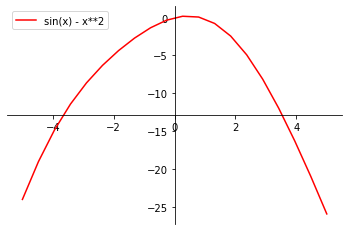

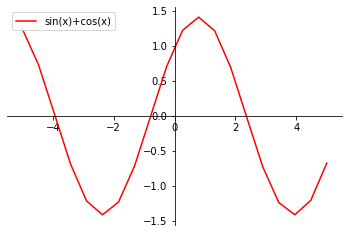

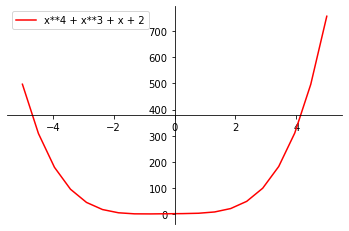

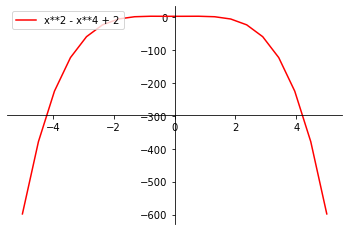

In [10]:
# Check if the functions above are convex or not by plotting them.
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from sympy import *

def plot_func(func, func_name):
    x = np.linspace(-5, 5, 20)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x, func(x), color='red', label=func_name)
    plt.legend(loc='upper left')
    plt.show()


def functionalize(func):
    return lambdify(Symbol('x'), func, 'numpy')


func1 = "sin(x) - x**2"
func2 = "sin(x)+cos(x)"
func3 = "x**4 + x**3 + x + 2"
func4 = "x**2 - x**4 + 2"

func1a, func2a, func3a, func4a = map(functionalize, [func1, func2, func3, func4])
plot_func(func1a, func1)
plot_func(func2a, func2)
plot_func(func3a, func3)
plot_func(func4a, func4)


In [ ]:
# Check if the functions above are convex or not by using convex optimization.
from scipy.optimize import minimize,minimize_scalar
from sympy import *
import numpy as np

def functionalize(func):
    return lambdify(Symbol('x'), func, 'numpy')


func1 = "sin(x) - x**2"
func2 = "sin(x)+cos(x)"
func3 = "x**4 + x**3 + x + 2"
func4 = "x**2 - x**4 + 2"

func1a, func2a, func3a, func4a = map(functionalize, [func1, func2, func3, func4])

def is_func_convex(function):
    flag = True
    for i in range(1000):
        lower_bound1 = random.randint(-50, -1)
        upper_bound1 = random.randint(0, 50)
        bounds = [(lower_bound1, upper_bound1)]
        random_init = np.array([1])
        res = minimize(function, x0=random_init, bounds=bounds)
        res1 = round(res.x[0], 3)

        lower_bound2 = random.randint(-100, lower_bound1)
        upper_bound2 = random.randint(upper_bound1, 100)
        bounds = [(lower_bound2, upper_bound2)]
        res = minimize(function, x0=random_init, bounds=bounds)
        res2 = round(res.x[0], 3)
        if res1 != res2:
            flag = False

    return flag


print(f"is {func1} convex =", is_func_convex(func1a))
print(f"is {func2} convex =", is_func_convex(func2a))
print(f"is {func3} convex =", is_func_convex(func3a))
print(f"is {func4} convex =", is_func_convex(func4a))

<ul>
<li>
Which functions are convex and which are non-convex?
 </li>
    only the third function(x^4 + x^3 + x + 2) is convex and others
    are non-convex
  <li>
What does each of the outputs of the minimize function mean?
 </li>
    the method minimize return a result which consists of the solution array,success, a Boolean indicating if the optimizer successfully terminated and a message which explains the termination reason
    the minimize function gives the minimum x in given interval so if we give an interval say (-2,2) and a bigger inter interval
    containig the smaller interval like (-5,5), if the outputs are the same, it means in that interval the minimum is the same and we don't have two minimas but if they are not then it means that we have two different minimas and convex functions have at most one minima
  <li>
If you have another analysis, you can explain here.
 </li>
 </ul>
    <h4>answer: as said above if we give that intervals to all the functions the results are as following :
    sin(x) - x**2       : -2 and -5 meaning that we have two different points thus the function is not convex(approved as seen in the graph)
    sin(x)+cos(x)       : -2 and -2.35 meaning that we have two different points thus the function is not convex(approved as seen in the graph) 
    x**4 + x**3 + x + 2 : -5 and 0 meaning that we have two different points thus the function is not convex(approved as seen in the graph)
    x**2 - x**4 + 2     :  -1 and -1 => we have same points so the function is convex
    </h4>
    </font>
</div>

---


**Theoretical:**
<p>Using the basin-hopping method, non-convex functions can be optimized. In this section, do your own research about how this algorithm works and explain it briefly and explicitly.
</p>


Write your answer here: 
<p>
Basin-hopping is a two-phase method that combines a global stepping algorithm with local minimization at each step, it uses iteration on the normal local minimizers and and each iteration(with wanted step) converges to the right answer

  In the previous section, you were given a number of functions and used two methods to check whether they were convex or not. In this section you should perform the following tasks using the basin-hopping method:
  <ul>
  <li>
Get the minimum of the functions that you categorized as non-convex.
  </li>
  <li>
Since there is no way for basin-hopping to realize the end of optimization, it is necessary to specify the number of steps to run the algorithm. Examine the effect of this issue on improving the answer and find the best number of steps to implement the algorithm using the function's graph.
    </li>
  <li>
Specify the location of the minimum point obtained by this algorithm on the function graph (so that you can see whether ot not your implementation has been successful).
    </li>
  </ul>

global minimum: sin(x) - x**2  :  5.0
global minimum: sin(x)+cos(x)  :  3.9269903536013486
global minimum: x**2 - x**4 + 2  :  5.0


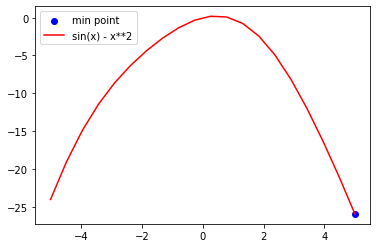

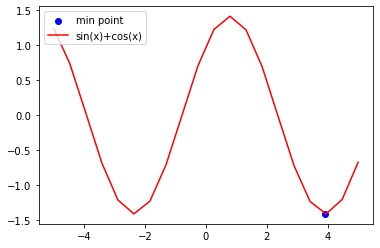

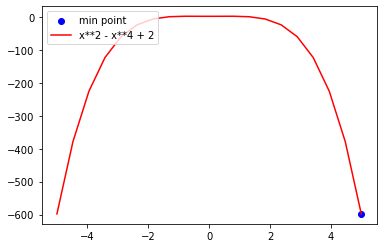

In [54]:
# Find the minimum of non-convex functions by the basin-hopping method. like before, you can only use scipy for this.
from scipy.optimize import basinhopping
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

def plot_func(func, func_name,point):
    
    x = np.linspace(-5, 5, 20)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
#     ax.set_ylim([-5,5])
#     ax.set_xlim([-5,5])
    plt.scatter(point, func(point), color='blue', label="min point")
    plt.plot(x, func(x), color='red', label=func_name)
    plt.legend(loc='upper left')
    plt.show()


func1 = "sin(x) - x**2"
func2 = "sin(x)+cos(x)"
func3 = "x**4 + x**3 + x + 2"
func4 = "x**2 - x**4 + 2"

func1a = lambda x:np.sin(x) - x**2
func2a = lambda x:np.sin(x)+np.cos(x)
func3a = lambda x:x**4 + x**3 + x + 2
func4a = lambda x:x**2 - x**4 + 2
#set a boundry!!
def basin_hoppins(iters, function,x0):
    x0 = [x0]
    minimizer_kwargs = {"method": "L-BFGS-B","bounds":[(-5,5)]}
    ret = basinhopping(function, x0, stepsize=0.5, minimizer_kwargs=minimizer_kwargs,

                       niter=iters)
    return (ret.x, ret.fun)

print("global minimum:",func1," : ",basin_hoppins(1, func1a,1)[0][0])
print("global minimum:",func2," : ",basin_hoppins(1, func2a,1)[0][0])
print("global minimum:",func4," : ",basin_hoppins(1, func4a,1)[0][0])

plot_func(func1a, func1,basin_hoppins(1, func1a,1)[0][0])
plot_func(func2a, func2,basin_hoppins(1, func2a,1)[0][0])
plot_func(func4a, func4,basin_hoppins(1, func4a,1)[0][0])

In [60]:
# Show the effect of the number of iterations on improving the answer.
from scipy.optimize import basinhopping
from sympy import *
import numpy as np

def functionalize(func):
    return lambdify(Symbol('x'), func, 'numpy')

#find the minimum
func1 = "sin(x) - x**2"
func2 = "sin(x)+cos(x)"
func3 = "x**4 + x**3 + x + 2"
func4 = "x**2 - x**4 + 2"

func1a, func2a, func3a, func4a = map(functionalize, [func1, func2, func3, func4])

def basin_hoppins(iters, function):
    x0 = [1]
    minimizer_kwargs = {"method": "BFGS"}
    ret = basinhopping(function, x0, stepsize=0.5, minimizer_kwargs=minimizer_kwargs,

                       niter=iters)
    print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

for iters in (1, 10,100,150):
    print(f"{func1} with iterations = {iters}")
    basin_hoppins(iters, func1a)
for iters in (1, 10,100,150):
    print(f"{func2} with iterations = {iters}")
    basin_hoppins(iters, func2a)
for iters in (1, 10,100,150):
    print(f"{func4} with iterations = {iters}")
    basin_hoppins(iters, func4a)

sin(x) - x**2 with iterations = 1
global minimum: x = 2069.7050, f(x0) = -4283678.3322
sin(x) - x**2 with iterations = 10
global minimum: x = 11377.1679, f(x0) = -129439949.7296
sin(x) - x**2 with iterations = 100
global minimum: x = 104457.0892, f(x0) = -10911283488.2905
sin(x) - x**2 with iterations = 150
global minimum: x = 156174.7618, f(x0) = -24390556220.3347
sin(x)+cos(x) with iterations = 1
global minimum: x = 3.9270, f(x0) = -1.4142
sin(x)+cos(x) with iterations = 10
global minimum: x = 3.9270, f(x0) = -1.4142
sin(x)+cos(x) with iterations = 100
global minimum: x = 3.9270, f(x0) = -1.4142
sin(x)+cos(x) with iterations = 150
global minimum: x = 3.9270, f(x0) = -1.4142
x**2 - x**4 + 2 with iterations = 1
global minimum: x = 2069.3552, f(x0) = -18337499067737.3477
x**2 - x**4 + 2 with iterations = 10
global minimum: x = 11376.3135, f(x0) = -16749668169850636.0000
x**2 - x**4 + 2 with iterations = 100
global minimum: x = 104459.7256, f(x0) = -119068127299094757376.0000
x**2 - x**4

# Q7:

*Author: Bahar Asadi*

**110 Points**

---


<h1>Linear Regression</h1>
<p>
In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.
</p>

<h2>Simple Linear Regression (40 points) </h2>
<p>
In statistics, simple linear regression is a linear regression model with a single explanatory variable.[1][2][3][4][5] That is, it concerns two-dimensional sample points with one independent variable and one dependent variable (conventionally, the x and y coordinates in a Cartesian coordinate system) and finds a linear function (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable values as a function of the independent variable.
The formula for this method is:
Y = β_0 + β_1 * X + ϵ
Where
Y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
β_0 is the intercept, the predicted value of y when the x is 0.
β_1 is the regression coefficient – how much we expect y to change as x increases.
X  is the independent variable ( the variable we expect is influencing y).
ϵ is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.
</br>
Linear regression finds the line of best fit through your data by searching for the regression coefficient (β_1) that minimizes the total error (ϵ) of the model according to least square error.
</p>



<p>
Now, in this part we would like to do simple linear regression for a set of points. To do so, you have to find Least Square error for parameters and find the best line that fits the dataset and plot it. You have two functions (find_coefficients and plot_result). You can change them if you want and you don't have to have exactly these functions.
</p>

In [ ]:
# libraries you may need
%pip install matplotlib

In [ ]:
# libraries you may need
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def find_coefficients(feature_vector, response_vector):
    x_sqr = [x**2 for x in feature_vector]
    xy = [x * y for x, y in zip(feature_vector, response_vector)]
    n = len(feature_vector)
    m = (n * sum(xy) - sum(feature_vector) * sum(response_vector)) / (n * sum(x_sqr) - sum(feature_vector) ** 2)
    c = (sum(response_vector) - m * sum(feature_vector)) / n
    return [m, c]

def plot_result(feature_vector, response_vector, b_0, b_1):
    plt.plot(feature_vector, response_vector, 'o', label='data')
    plt.plot(feature_vector, b_1 * feature_vector + b_0, 'r', label='regression line')
    plt.legend()
    plt.show()

In [ ]:
# data
feature_vector = np.array([10, 12, 15, 16, 17, 18, 19, 24, 27, 30])
response_vector = np.array([6, 2, 4, 4, 12, 5, 8, 15, 9, 9])
  
# finding coefficients
betas = find_coefficients(feature_vector, response_vector)
beta_0 = betas[1]
beta_1 = betas[0]

In [ ]:
beta_0

In [ ]:
beta_1

In [ ]:
plot_result(feature_vector, response_vector, beta_0, beta_1)

<p>
Now you know what linear regression is and how close it is to interpolation. In this part, please mention the differences between linear regression and interpolation.
</p>
<p>
Your answer (5 points):
</br>
interpolation tries to achieve perfect match to the given data but it can't generalize, on the other hand linear regression won't fit perfectly to your data but at it will try to learn some insights from it.
</p>

<h1>Fourier Transform</h1>
<p>
A Fourier transform (FT) is a mathematical transform that decomposes functions depending on space or time into functions depending on spatial frequency or temporal frequency. An example application would be decomposing the waveform of a musical chord into terms of the intensity of its constituent pitches. The term Fourier transform refers to both the frequency domain representation and the mathematical operation that is associated with the frequency domain representation of a function of space or time.
</p>



<p>
There are different classes of Fourier Transform. We want to talk about two classes: Discrete Fourier Transform and Fast Fourier Transform. For more information about Fourier Transform you can follow this link:

 [Fourier Tranform Lecture](https://www.le.ac.uk/users/dsgp1/LODZLECT/Lodz5.pdf)
 
</p>

<h2> Discrete Fourier Transform (DFT) (25 points)</h2>
<p>
In mathematics, the discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The interval at which the DTFT is sampled is the reciprocal of the duration of the input sequence.

The formula for this transformation is:

$X_{k} = \sum_{n = 0}^{N - 1} x_{n} . e^{i 2\pi k n /N} = \sum_{n = 0}^{N - 1}x_{n}\left [ cos(2\pi k n/N) - i.sin(2\pi k n/N)) \right ]$

where

N = number of samples

n = current sample

k = current frequency, where k∈[0,N−1]

xn = the sine value at sample n

Xk = The DFT which includes information on both amplitude and phase
</p>

<p>
Here, we have caculated sum of three trigonometric functions and plotted them as one function. Implement a function to calculate DFT for a function which is the summation of three trigonometric functions.
</p>

In [ ]:
plt.style.use('seaborn-poster')
%matplotlib inline
def plot_function(sampling_rate):
# sampling rate
    # sampling interval
    interval = 1.0/sampling_rate
    t = np.arange(0,1,interval)

    freq = 2
    x = 5*np.sin(2*np.pi*freq*t)

    freq = 0.5
    x += -1 * np.cos(2*np.pi*freq*t)

    freq = 15  
    x += 2.5* np.sin(2*np.pi*freq*t)

    plt.figure(figsize = (8, 6))
    plt.plot(t, x, 'g')
    plt.ylabel('Amplitude')

    plt.show()
    return x

In [ ]:
def DFT(x):
    # 25 points
    N = len(x)
    X = np.zeros((N,), dtype=complex)
    for m in range(0, N):
        for n in range(0, N):
            X[m] += x[n] * np.exp(-np.pi * 2j * m * n / N)
    return X

In [ ]:
def plot_DFT_or_FFT(X, sampling_rate, plot_type):
    # calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N/sampling_rate
    freq = n/T 

    plt.figure(figsize = (8, 6))
    plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    label = plot_type + 'Amplitude |X(freq)|'
    plt.show()

In [ ]:
sampling_rates = [4, 16, 64, 128, 256, 512]
for sampling_rate in sampling_rates:
    x = plot_function(sampling_rate)
    X = DFT(x)
    plot_DFT_or_FFT(X, sampling_rate, 'DFT')

<h2> Fast Fourier Transform (45 points)</h2>
<p>
In order to get around the calculational expense of the standard form of the discrete Fourier transform (DFT), Cooley and Tukey (1965) figured out how to remove much of the redundancy in the equations above and came up with what is now known as the Fast Fourier Transform (FFT). The FFT is not a simple equation, but an algorithm which allows the Fourier transform of discrete data sets in $n\log_{2}n$ steps, instead of $n^2$. Note that certain errors creep into the calculation because of discretizing the data, but they are found in all DFTs. The FFT is merely one particularly efficient method of calculating a DFT and introduces no additional errors. Also note that the data sampling rate must satisfy the Nyquist Theorem.
</p>

<p>
One important thing that FFT algorithm uses is the symmetry in DFT formula. In this part use DFT formula and calculate

 $ X_{N+k} $ 
 
 and prove symmetry in the formula. (Your answer "can" be code or simply a hand-written answer or a latex formula in the cell below. However, please mention how you answered (code, hand-written or latex) and upload your hand-written answers if you have any.)
</p>

# Here is for your answer if you need (can be code, latex formula or a picture)
# 10 points
latex :
<p>  
$X_{a} = \sum_{n = 0}^{N - 1} x_{n} . e^{i 2\pi a n /N} = \sum_{n = 0}^{N - 1}x_{n}\left [ cos(2\pi a n/N) - i.sin(2\pi a n/N)) \right ] \xrightarrow[]{\text{a = k+N}} =$

$\sum_{n = 0}^{N - 1}x_{n}\left [ cos(2\pi k n/N + 2n\pi) - i.sin(2\pi k n/N+ 2n\pi)) \right] \xrightarrow[cos(t+2n\pi)=cos(t)]{sin(t+2n\pi)=sin(t)} = $
\\
$
\sum_{n = 0}^{N - 1}x_{n}\left [ cos(2\pi k n/N) - i.sin(2\pi k n/N)) \right ]
$

<p>
Main idea of FFT is to classify numbers from 0 to N into two classes: odd and even. And after this classification, it calculatess the Fourier Transform for each class. In this part, use this idea and calculate


$X_{k}$

(Your answer "can" be code or simply a hand-written answer or latex formula in the cell below. However, please mention how you answered (code, hand-written or latex) and upload your hand-written answer if you have any.)
</p>

# Here is for your answer if you need (can be code, latex formula or a picture)
# 10 points
latex:
<p>
    $X_{k} = \sum_{ n = 0}^{N - 1} x_{2m} . e^{i 2\pi k n /N} = \sum_{n = 0}^{N/2 - 1} x_{2m+1} . e^{i 2\pi k (2m+1) /N} + \sum_{n = 0}^{N/2 - 1} x_{2m} . e^{i 2\pi k (2m) /N}$
</p>

<p>
Now, use two previous parts (symmetry and classifying) and conclude that caculations in FFT are less than in DFT. (Compare the order of the two algorithms.) (Just explanation is enough for this part.)
</p>

<p>
Your answer: 
    $\\$
    if we use the formula below:
    $X_{k} = \sum_{ n = 0}^{N - 1} x_{2m} . e^{-i 2\pi k n /N} =\\ \sum_{m = 0}^{N/2 - 1} x_{2m+1} . e^{-i 2\pi k (2m+1) /N} +\sum_{m = 0}^{N/2 - 1} x_{2m} . e^{-i 2\pi k (2m) /N} \\=
 e^{-i 2\pi k/N}\sum_{m = 0}^{N/2 - 1} x_{2m+1} . e^{-i 2\pi k m /(N/2)} +\sum_{m = 0}^{N/2 - 1} x_{2m} . e^{-i 2\pi k m /(N/2)}   
$
we could see that these are two parts that only contain half of the lower interval parts thus are calculated by using the DFT but we need the full interval, so this is where symmetry comes in place so we can continue to divide each term into half with the even and odd values until it reaches the last two numbers
</p>

<p>
In this part, implement the FFT function and check this function with the previous trigonometric function we had.
</br>
your implemention can be recursive or non-recursive but you cannot use the built-in function "fft" in numpy library.
</p>

In [ ]:
def FFT(x):
    # 25 points
    N = len(x)
    if N == 1:
        return x
    else:
        even = FFT(x[::2])
        odd = FFT(x[1::2])
        even_coef = np.array([np.exp(-2j * np.pi * i / N) for i in range(N)])
        T = np.zeros((N,), dtype=complex)
        for i in range(N):
            if i < N / 2:
                T[i] = even[i] + even_coef[i] * odd[i]
            else:
                T[i] = even[i-int(N/2)] + even_coef[i] * odd[i-int(N/2)]
    return T

In [ ]:
sampling_rates = [4, 8, 16, 32, 64, 128, 256,512]
for sampling_rate in sampling_rates:
    x = plot_function(sampling_rate)
    X = FFT(x)
    plot_DFT_or_FFT(X, sampling_rate, 'FFT')

<p>
At last, compare average time of the two algorithms in practice.
</p>

In [ ]:
# 5 points
# Your code
import time
"""the first programs (DFT) order is of O(n^2) because of the two nested loops it has to iterate two time over the whole array

    the second programs (FFT) order is of O(nlogn) because if we see it as a computation tree we have to go logn levels deep
    and in each level we at most n computations so the total cost is O(n*logn)
"""
def plot_function(sampling_rate):
    
    interval = 1.0/sampling_rate
    t = np.arange(0,1,interval)

    freq = 2
    x = 5*np.sin(2*np.pi*freq*t)

    freq = 0.5
    x += -1 * np.cos(2*np.pi*freq*t)

    freq = 15  
    x += 2.5* np.sin(2*np.pi*freq*t)
    return x

t_FFT = time.time()
sampling_rates = [4, 8, 16, 32, 64, 128, 256,512]
for sampling_rate in sampling_rates:
    
    x = plot_function(sampling_rate)
    X = FFT(x)
print("time of FFT = ",time.time()-t_FFT)
t_DFF = time.time()
for sampling_rate in sampling_rates:
    x = plot_function(sampling_rate)
    X = DFT(x)   
print("time of DFT = ",time.time()-t_DFF)

# Q8:

*Author: Kasra Amani*

**25 Points**

---


**Theoretical:**<br>
Up to this point, you have studied numerous different methods for solving Ordinary Differential Equations (ODEs), but completely ignored Partial Differential Equations (PDEs). These equations are widely used in Computational Fluid Dynamics (CFDs) and heat transfer simulations.
Do your own research and explain in a few paragraphs a method which can solve a PDE using ODE solving methods that you have learned earlier.
<p>
    There is a method MOL(method of lines) which could generaly solve time dependant PDEs which can transform a PDE into ODE and 
    thus afterwards we can use normal ODE methods like Runge-Kutta to solve the PDE

**Practical:**<br>
Finite difference approximation of PDEs is a very useful method that is widely used in heat transfer and study of fluid mechanics. It is **strongly encouraged** for you to study [this pdf](https://www.lkouniv.ac.in/site/writereaddata/siteContent/202004032250572068siddharth_bhatt_engg_Numerical_Solution_of_Partial_Differential_Equations.pdf) for further info on numerically solving PDEs before proceeding with this problem.
Solve the elliptic equation $$u_{xx}+u_{yy}=0$$ for the following square mesh with boundary values as shown in the figure down below.

<img src="grid.jpg" alt="grid" width="300"/>

Notice that this question is identical to the one on page 8 of the pdf provided earlier and the main goal is for you to become familiar with the finite difference method. You must also implement your code in a way so that it would work for other boundary values as well and also you must use either Gauss-Seidal or Jacobi's method to improve the final values with decent accuracy.

In [2]:
#your code goes here
import numpy as np
import copy
def five_point_method(b, tolerance):
    #we find the initial values
    b[3][3] = 1 / 4 * (b[3][5] + b[5][3] + b[3][1] + b[1][3])
    b[2][4] = 1 / 4 * (b[1][5] + b[3][3] + b[3][5] + b[1][3])
    b[4][4] = 1 / 4 * (b[3][5] + b[5][3] + b[3][3] + b[5][5])
    b[4][2] = 1 / 4 * (b[3][3] + b[5][1] + b[3][1] + b[5][3])
    b[2][2] = 1 / 4 * (b[1][3] + b[3][1] + b[3][3] + b[1][1])
    b[2][3] = 1 / 4 * (b[1][3] + b[3][3] + b[2][4] + b[2][2])
    b[3][4] = 1 / 4 * (b[2][4] + b[4][4] + b[3][5] + b[3][3])
    b[4][3] = 1 / 4 * (b[3][3] + b[5][3] + b[4][4] + b[4][2])
    b[3][2] = 1 / 4 * (b[2][2] + b[4][2] + b[3][3] + b[3][1])
    u_new = copy.deepcopy(b)
    n = 0
    #now we use gauss-sidel to improve our answer:
    while True:
        n += 1
        for j in range(4, 1, -1):
            for i in range(2, 5):
                u_new[i][j] = 1 / 4 * (u_new[i - 1][j] + u_new[i + 1][j] + u_new[i][j - 1] + u_new[i][j + 1])
        return_value = True
        for j in range(4, 1, -1):
            for i in range(2, 5):
                if abs(u_new[i][j] - b[i][j]) > tolerance:
                    return_value = False
        if return_value:
            return np.flipud((np.array(u_new)[1:, 1:]).T)
        b = copy.deepcopy(u_new)


b = [[0.0 for i in range(0, 6)] for j in range(0, 6)]
#if you want to find the notebooks answers, uncomment the bellow comments and comment the input 

# b[1][5] = b[1][1] = b[5][5] = b[5][1] = 0
# b[1][4] = b[1][2] = b[5][4] = b[5][2] = 1000
# b[1][3] = b[5][3] = 2000
# b[3][1] = b[3][5] = 1000
# b[2][1] = b[4][1] = b[2][5] = b[4][5] = 500
for i in range(1, 6):
    for j in range(1, 6):
        if i == 1 or (1 < i < 5 and (j == 1 or j == 5)) \
                or i == 5:
            b[i][j] = float(input(f"enter b[{i}][{j}] : "))
print(five_point_method(b, 0.001))

[[   0.          500.         1000.          500.            0.        ]
 [1000.          937.50075996 1000.00075996  937.50037998 1000.        ]
 [2000.         1250.00075996 1125.00075996 1250.00037998 2000.        ]
 [1000.          937.50037998 1000.00037998  937.50018999 1000.        ]
 [   0.          500.         1000.          500.            0.        ]]
